<a href="https://colab.research.google.com/github/ArthurMarqq/Bootcamp_DS_Alura/blob/main/dataset_internacoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

In [21]:
dataset = pd.read_csv('/content/A151346189_28_143_208.csv', encoding="ISO-8859-1", skiprows =3, sep=";", skipfooter=12,
                      thousands = ".", decimal = ",") 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [22]:
dataset

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2.931283e+06,1.541683e+06,1.525315e+06,1.645954e+06,1.406151e+06,3.065279e+06,3.231495e+06,3.117179e+06,3.068430e+06,2.825839e+06,2.931174e+06,2.885269e+06,2.860104e+06,3.684945e+06,3.607290e+06,3.774357e+06,3.706712e+06,3.763188e+06,3.533626e+06,3605007.43,3.907033e+06,3.939821e+06,3.901084e+06,3.684407e+06,3.623016e+06,3.890462e+06,4.193534e+06,4.534401e+06,4.451208e+06,4.874593e+06,4.460802e+06,5.067886e+06,4.511093e+06,4.394680e+06,4.098742e+06,4.411499e+06,3.868618e+06,4.298703e+06,...,7.948292e+06,8.438077e+06,7.656645e+06,8.047743e+06,8.657206e+06,8.150894e+06,7.507845e+06,7.998346e+06,8.893684e+06,8.867793e+06,8.871408e+06,8.501602e+06,8.315108e+06,8.525500e+06,9.177611e+06,7.368996e+06,8.835095e+06,8.328187e+06,8.408513e+06,9.351706e+06,8.143008e+06,8.949742e+06,9.630553e+06,9.581970e+06,7.891114e+06,9.792371e+06,9.170788e+06,8.816847e+06,1.002455e+07,9.675424e+06,8.085026e+06,9.221412e+06,7.493311e+06,8.092260e+06,7.273844e+06,7.652120e+06,8.725531e+06,1.115211e+07,10285455.78,9.291297e+08
1,12 Acre,902416.00,1.497206e+06,1.794028e+06,1.730469e+06,1.819444e+06,1.828496e+06,2.511755e+06,2.089107e+06,2.275709e+06,1.923887e+06,1.756987e+06,2.235640e+06,2.497116e+06,2.253558e+06,2.122674e+06,2.834318e+06,2.722066e+06,2.432832e+06,2.630191e+06,2.307579e+06,-,2.826477e+06,2.170791e+06,2.541526e+06,2.491042e+06,1.954474e+06,2.389996e+06,2.654879e+06,2.844085e+06,2.336207e+06,2.125143e+06,2.430294e+06,2.377738e+06,2.184747e+06,2.468453e+06,2.516285e+06,3.051370e+06,2.629104e+06,2.485452e+06,...,2.397513e+06,2.348760e+06,3.139155e+06,2.765063e+06,4.540085e+06,4.120229e+06,2.610455e+06,3.576595e+06,2.444567e+06,2.602434e+06,3.064163e+06,2.276237e+06,3.239474e+06,3.126430e+06,2.998866e+06,2.619710e+06,3.018049e+06,3.342614e+06,2.123426e+06,2.664655e+06,1.906430e+06,3.096440e+06,2.411628e+06,2.840631e+06,3.260154e+06,3.250723e+06,3.204999e+06,3.052746e+06,3.124802e+06,3.021522e+06,2.874871e+06,3.331804e+06,3.417691e+06,3.076003e+06,2.286643e+06,2.896340e+06,3.045246e+06,3.915193e+06,-,4.206680e+08
2,13 Amazonas,4735529.42,7.118991e+06,8.196635e+06,8.259378e+06,7.831400e+06,8.477274e+06,9.368859e+06,9.352533e+06,9.363099e+06,8.618319e+06,6.555549e+06,7.777646e+06,7.403068e+06,6.683347e+06,9.927781e+06,8.844511e+06,9.079036e+06,8.832895e+06,9.373396e+06,9.578326e+06,9730634.16,9.179253e+06,8.314649e+06,9.050439e+06,9.419461e+06,8.680179e+06,9.168055e+06,9.897902e+06,9.651362e+06,1.085460e+07,1.041712e+07,8.718347e+06,8.221592e+06,9.613977e+06,9.927574e+06,9.470661e+06,9.736751e+06,8.745260e+06,9.380112e+06,...,1.278964e+07,1.437699e+07,1.424007e+07,1.359465e+07,1.458429e+07,1.315872e+07,1.316966e+07,1.357226e+07,1.308308e+07,1.432231e+07,1.464334e+07,1.463221e+07,1.450052e+07,1.484053e+07,1.442762e+07,1.581896e+07,1.635846e+07,1.539116e+07,1.415436e+07,1.679140e+07,1.436999e+07,1.633902e+07,1.562291e+07,1.648317e+07,1.542224e+07,1.596199e+07,1.578790e+07,1.651544e+07,1.573120e+07,1.574461e+07,1.434655e+07,1.601846e+07,1.491375e+07,1.506830e+07,1.350958e+07,1.965859e+07,2.089754e+07,1.934645e+07,14726443.67,1.771655e+09
3,14 Roraima,657889.53,7.779393e+05,7.186880e+05,8.399944e+05,8.623480e+05,8.324407e+05,9.966931e+05,8.942712e+05,9.104242e+05,1.191770e+06,1.056219e+06,1.244339e+06,1.08

In [23]:
pd.options.display.float_format = "{:2f}".format

In [24]:
dataset

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.390000,2931283.420000,1541682.520000,1525314.960000,1645953.840000,1406150.680000,3065279.010000,3231494.610000,3117178.630000,3068430.440000,2825838.520000,2931173.580000,2885269.070000,2860103.740000,3684944.680000,3607289.680000,3774356.600000,3706711.840000,3763187.550000,3533625.830000,3605007.43,3907032.720000,3939820.710000,3901084.110000,3684407.020000,3623015.580000,3890461.900000,4193533.870000,4534400.670000,4451208.030000,4874592.780000,4460802.380000,5067886.240000,4511092.850000,4394680.500000,4098741.800000,4411499.480000,3868617.950000,4298702.780000,...,7948291.630000,8438077.450000,7656644.830000,8047742.980000,8657206.230000,8150893.680000,7507845.130000,7998345.940000,8893683.690000,8867793.320000,8871408.500000,8501601.670000,8315107.810000,8525499.780000,9177611.460000,7368996.380000,8835095.430000,8328186.640000,8408512.770000,9351705.820000,8143007.970000,8949741.770000,9630553.150000,9581970.310000,7891114.050000,9792370.670000,9170787.530000,8816846.710000,10024554.150000,9675423.700000,8085025.660000,9221412.180000,7493310.880000,8092260.110000,7273843.630000,7652120.280000,8725530.680000,11152107.080000,10285455.78,929129659.720000
1,12 Acre,902416.000000,1497206.260000,1794028.480000,1730469.420000,1819443.920000,1828496.000000,2511754.590000,2089107.140000,2275708.530000,1923886.570000,1756986.800000,2235639.980000,2497116.430000,2253558.010000,2122673.920000,2834317.620000,2722065.970000,2432831.950000,2630190.650000,2307579.000000,-,2826477.020000,2170791.180000,2541526.440000,2491042.330000,1954473.900000,2389996.380000,2654878.600000,2844085.210000,2336207.190000,2125143.060000,2430293.670000,2377738.440000,2184746.840000,2468452.900000,2516284.540000,3051370.080000,2629104.420000,2485451.790000,...,2397512.850000,2348760.000000,3139155.410000,2765062.920000,4540084.780000,4120228.960000,2610454.550000,3576595.190000,2444567.370000,2602434.350000,3064163.420000,2276236.690000,3239474.100000,3126429.880000,2998865.510000,2619709.860000,3018048.940000,3342614.240000,2123426.260000,2664654.520000,1906429.950000,3096439.630000,2411628.000000,2840630.580000,3260153.590000,3250722.840000,3204998.880000,3052745.650000,3124802.290000,3021521.750000,2874871.280000,3331803.550000,3417691.070000,3076003.200000,2286642.600000,2896340.240000,3045245.800000,3915193.200000,-,420668039.630000
2,13 Amazonas,4735529.420000,7118990.570000,8196635.490000,8259378.420000,7831399.900000,8477273.620000,9368858.720000,9352532.700000,9363099.350000,8618318.830000,6555549.080000,7777645.880000,7403068.360000,6683346.890000,9927781.200000,8844511.210000,9079035.960000,8832894.530000,9373395.970000,9578326.030000,9730634.16,9179252.650000,8314648.930000,9050439.390000,9419460.860000,8680178.570000,9168055.410000,9897901.800000,9651362.370000,10854599.470000,10417122.890000,8718347.130000,8221592.120000,9613977.030000,9927574.410000,9470661.210000,9736750.910000,8745259.800000,9380112.360000,...,12789637.850000,14376990.410000,14240071.260000,13594647.250000,14584288.950000,13158724.610000,13169660.320000,13572263.030000,13083081.700000,14322305.220000,14643340.510000,14632208.090000,14500521.140000,14840533.420000,14427620.910000,15818964.250000,16358462.570000,15391163.740000,141

In [25]:
dataset.mean()

2008/Jan     15126846.638148
2008/Fev     22710158.118889
2008/Mar     24594187.347407
2008/Abr     25431957.830370
2008/Mai     26511245.907037
                  ...       
2020/Abr     41013660.390000
2020/Mai     44193633.748519
2020/Jun     47329994.462963
2020/Jul     54495511.572593
Total      5993731798.297777
Length: 151, dtype: float64

In [26]:
dataset['2008/Ago'].mean()

27800320.306666665

Text(0.5, 1.0, 'Custo total em procedimentos hospitalares por unidade da federação')

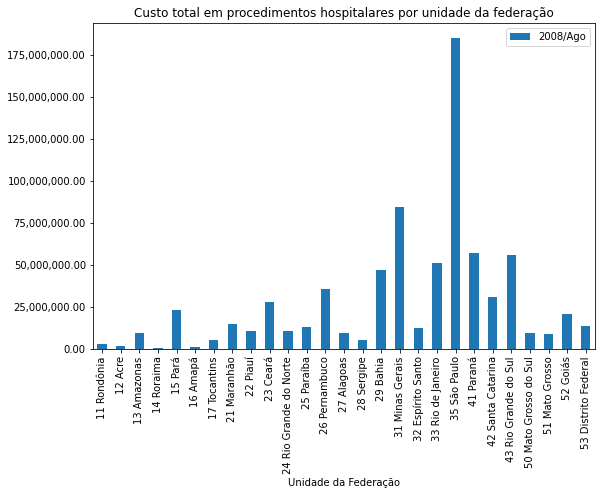

In [39]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = dataset.plot(x = "Unidade da Federação", y = "2008/Ago", kind="bar", figsize=(9,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Custo total em procedimentos hospitalares por unidade da federação")